## Demonstration on whether Multicolinearity affect prediction or not?

Coefficients: [ 7.82975574 -0.35506105]
Intercept: 0.05538294242873539
Predictions: [ -8.25677018   2.25780167  -5.23098428  -4.92651182   2.97959446
   2.70531829  11.16972937   3.30759815 -10.94470512   1.68484423
   3.82928598  14.13943351   9.49933304  -3.36890348  -1.51832659
  -4.23115591  -4.78889462  -0.68215734   0.10740839  13.66402891]
Actual values: [ -9.18480789   1.89862658  -6.15211091  -4.64957931   2.32888989
   3.49898934  10.15840282   3.02663273 -12.17106152  -0.19450888
   4.45283699  13.87072588   7.54389661  -2.21001374  -1.37663505
  -3.17231328  -3.345748    -1.00537557   0.07855777  12.6486582 ]
R-squared score: 0.9780759660909195
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1449.
Date:              

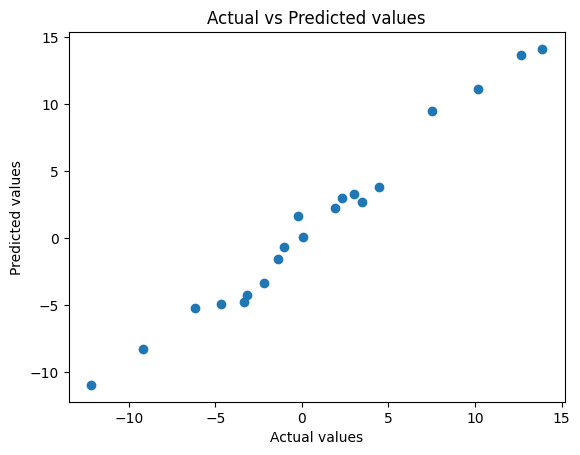

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Seed for reproducibility
np.random.seed(19)

# Generate synthetic data
n_samples = 100
X1 = np.random.normal(0, 1, n_samples)
X2 = 2 * X1 + np.random.normal(0, 0.1, n_samples)  # X2 highly correlated with X1
y = 3 * X1 + 2 * X2 + np.random.normal(0, 1, n_samples)

# Create a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Split the data
X = data[['X1', 'X2']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Display the predictions
print("Predictions:", y_pred)

# Display actual values
print("Actual values:", y_test.values)

# Display the R-squared score
print("R-squared score:", model.score(X_test, y_test))

# Use statsmodels for more detailed statistics
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

Coefficients: [7.11440157]
Intercept: 0.060390593241332044
Predictions: [ -8.28250771   2.2515214   -5.33172505  -4.93303808   3.01629575
   2.72715527  11.14833676   3.27780362 -10.95513134   1.63269655
   3.80636669  14.1355849    9.50421933  -3.37808444  -1.49696913
  -4.23165265  -4.7852587   -0.803173     0.05401461  13.70186201]
Actual values: [ -9.18480789   1.89862658  -6.15211091  -4.64957931   2.32888989
   3.49898934  10.15840282   3.02663273 -12.17106152  -0.19450888
   4.45283699  13.87072588   7.54389661  -2.21001374  -1.37663505
  -3.17231328  -3.345748    -1.00537557   0.07855777  12.6486582 ]
R-squared score: 0.9785569288486123
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2932.
Date:                Thu, 15 Ja

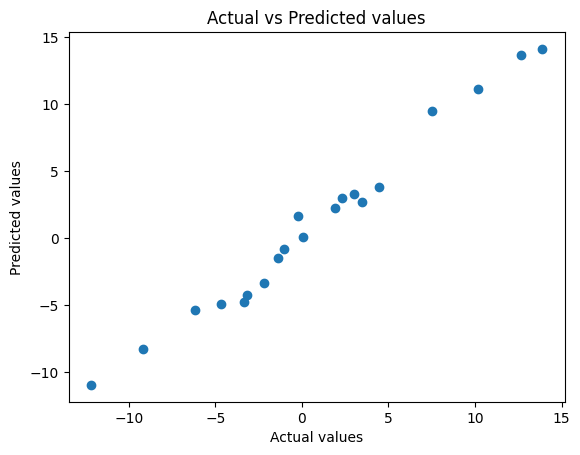

In [2]:
# Split the data
X = data[['X1']] # Removed X2 from our data
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state same to get same split

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Display the predictions
print("Predictions:", y_pred)

# Display actual values
print("Actual values:", y_test.values)

# Display the R-squared score
print("R-squared score:", model.score(X_test, y_test))

# Use statsmodels for more detailed statistics
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

The results you provided show how multicollinearity affects the standard errors of the regression coefficients but does not significantly impact the model's predictive power.

### Explanation:

1. **With Multicollinearity (X1 and X2)**:
    - **Coefficients**: `[ 7.82975574, -0.35506105]`
    - **Intercept**: `0.05538294242873539`
    - **R-squared score**: `0.9780759660909195`
    - **OLS Regression Results**:
        - Large standard errors for the coefficients (`X1: 2.255`, `X2: 1.117`).
        - High `R-squared` value indicating good fit.

2. **Without Multicollinearity (only X1)**:
    - **Coefficients**: `[7.11440157]`
    - **Intercept**: `0.060390593241332044`
    - **R-squared score**: `0.9785569288486123`
    - **OLS Regression Results**:
        - Smaller standard error for the coefficient (`X1: 0.131`).
        - High `R-squared` value indicating good fit.

### Interpretation:

- **Predictions**: The predictions remain accurate and close to the actual values in both cases. This demonstrates that multicollinearity does not significantly affect the model's ability to make predictions.

- **Standard Errors**: When multicollinearity is present, the standard errors of the coefficients are inflated. This makes it difficult to determine the individual effect of each predictor. However, this does not degrade the model's predictive performance, as seen from the similar R-squared scores and prediction accuracy.

